# Distance Model

## Imports

In [2]:
import matplotlib
import seaborn as sns
import sys
sys.setrecursionlimit(5000)
sns.set_context('notebook')
%load_ext autoreload
%autoreload 2
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 200
from matplotlib import pyplot as plt

import numpy as np
from scipy import optimize
from sklearn import model_selection, metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate Synthetic Data

### Data with Distance Relationship

In [43]:
optimal_distances = 7
optimal_score = 7
total_samples = 1000

# generate positive samples with good score and good distances
pos_distances = np.random.normal(
    loc = optimal_distances, # mean
    scale=0.75, # standard devication
    size=int(total_samples/2) # num samples
)
neg_distances = np.random.normal(
    loc = 10 - optimal_distances, # mean
    scale=2, # standard devication
    size=int(total_samples/2) # num samples
)
pos_scores = np.random.normal(
    loc = optimal_score, # mean
    scale=0.75, # standard devication
    size=int(total_samples/2) # num samples
)
neg_scores = np.random.normal(
    loc = 10 - optimal_score, # mean
    scale=2, # standard devication
    size=int(total_samples/2) # num samples
)

scores = list(pos_scores) + list(neg_scores)
distances = list(pos_distances) + list(neg_distances)

# min max scores and distances
scores = np.array([max(0,x) for x in scores])
distances = np.array([max(0,x) for x in distances])
labels = [1 for x in range(int(total_samples/2))] + [0 for x in range(int(total_samples/2))]

distance_data = (scores[:], distances[:], labels)

### Data without Distance Relationship

In [44]:
optimal_distances = 7
optimal_score = 7
total_samples = 1000

# generate positive samples with good score and good distances
distances = np.random.normal(
    loc = 5,
    scale=3, # standard devication
    size=total_samples # num samples
)
pos_scores = np.random.normal(
    loc = optimal_score, # mean
    scale=0.75, # standard devication
    size=int(total_samples/2) # num samples
)
neg_scores = np.random.normal(
    loc = 10 - optimal_score, # mean
    scale=2, # standard devication
    size=int(total_samples/2) # num samples
)

scores = list(pos_scores) + list(neg_scores)

# min max scores and distances
scores = np.array([max(0,x) for x in scores])
distances = np.array([max(0,x) for x in distances])
labels = [1 for x in range(int(total_samples/2))] + [0 for x in range(int(total_samples/2))]

nodistance_data = (scores[:], distances[:], labels)

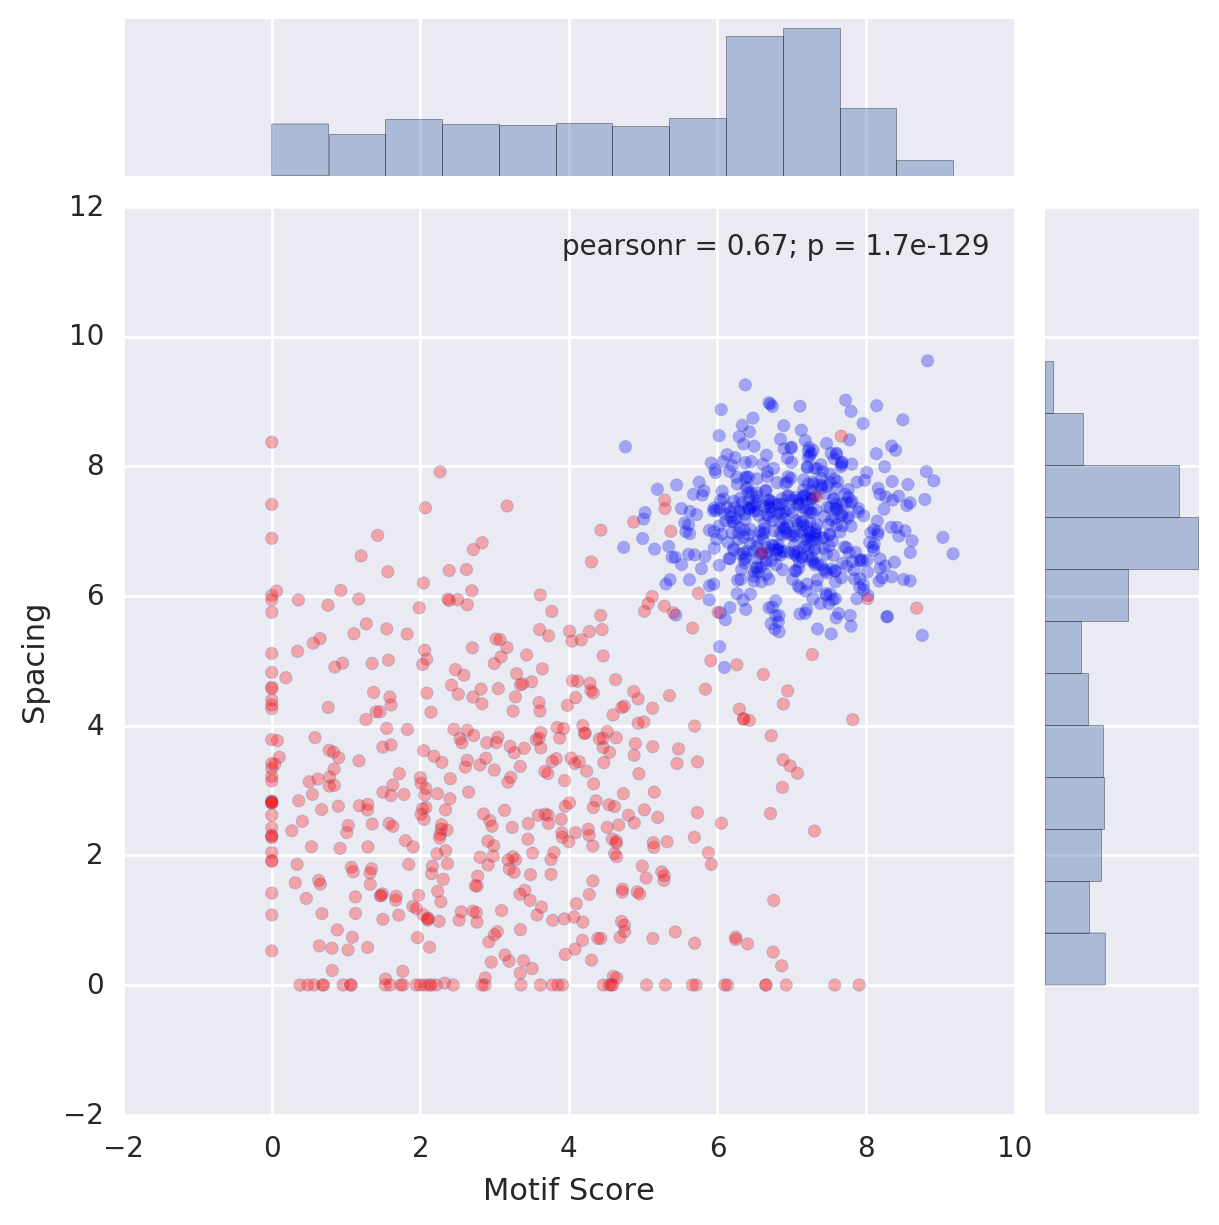

In [47]:
jg = sns.jointplot(
    x=distance_data[0], # score
    y=distance_data[1], # distance
    c= ['blue' if x == 1 else 'red' for x in distance_data[2]],
    alpha= 0.3,
)
jg.ax_joint.set_xlabel('Motif Score')
jg.ax_joint.set_ylabel('Spacing')

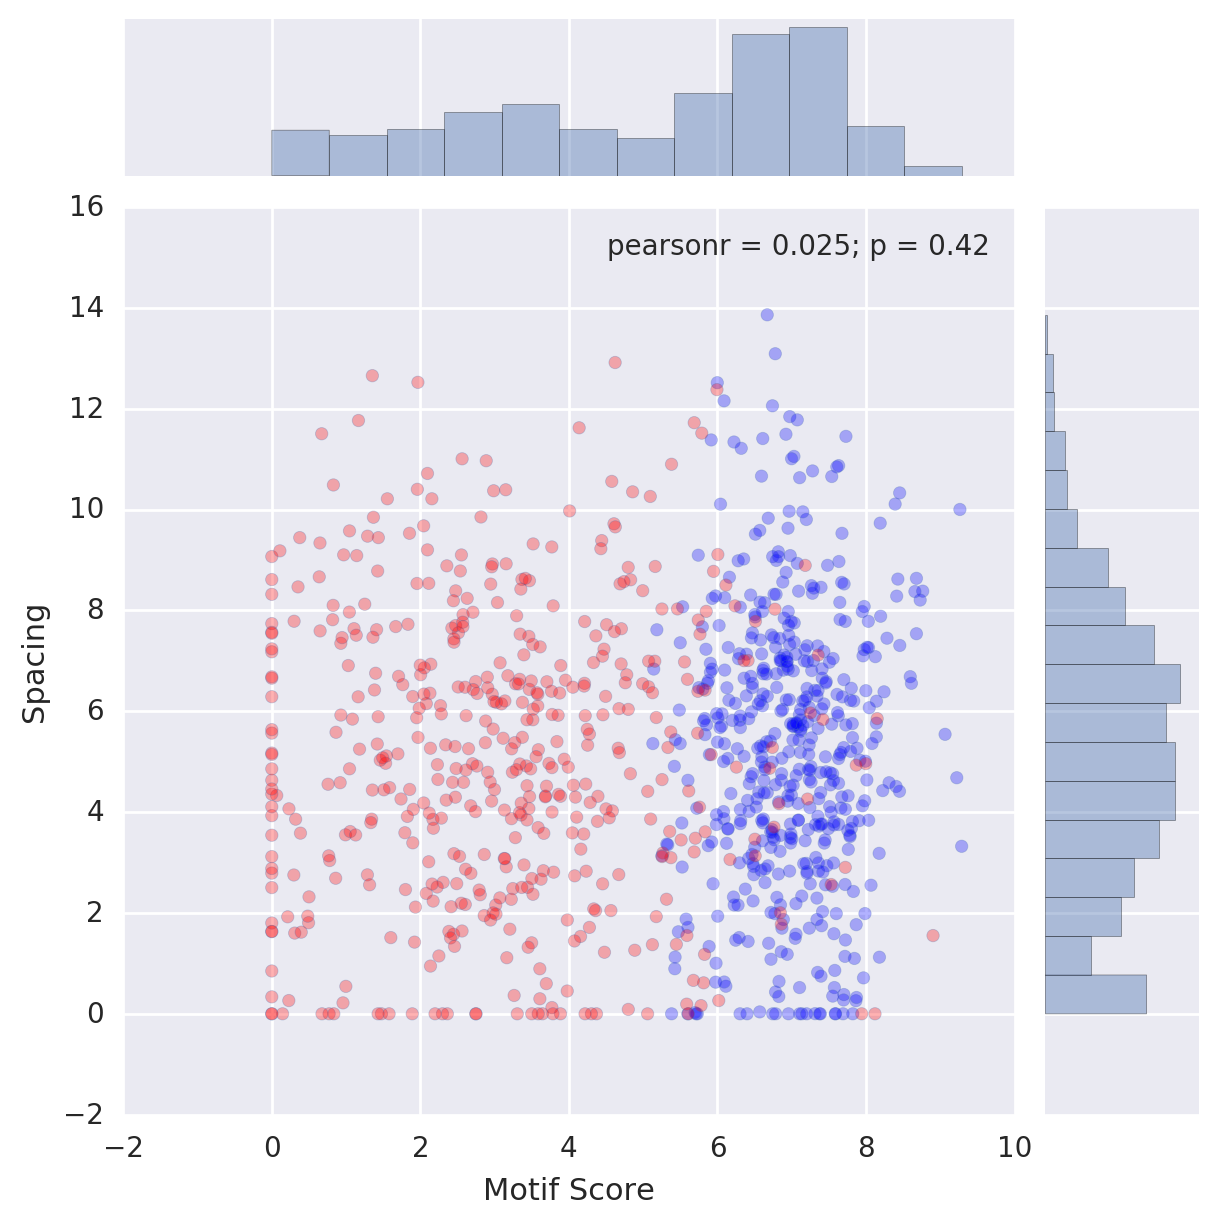

In [49]:
jg=sns.jointplot(
    x=nodistance_data[0], 
    y=nodistance_data[1],
    c= ['blue' if x == 1 else 'red' for x in nodistance_data[2]],
    alpha= 0.3,
)
jg.ax_joint.set_xlabel('Motif Score')
jg.ax_joint.set_ylabel('Spacing')

## Definte Model Functions

In [56]:
import pandas as pd

In [ ]:
# model

In [50]:
def sigmoid(z):  
    return 1 / (1 + np.exp(-z))

In [52]:
# jacobian
def gradient(weights, X, y):  
    weights = np.matrix(weights)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(weights.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * weights.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [53]:
def predict(weights, X):  
    probability = sigmoid(X * weights.T)
    return [1 if x >= 0.5 else 0 for x in probability]



In [115]:
def loss(weights, X, y):  
    weights = np.matrix(weights)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * weights.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * weights.T)))
    return np.sum(first - second) / (len(X))

## Perform Optimization

In [ ]:
optimize.minimize(
    loss_function, # function to optimize
    x0, # initial weights
    args=(), # initial arguments to pass in
    method='BFGS', # optimization method
    jac=None, # jacobian
    hess=None, # hessian
    bounds=None, # bounds for variables
    tol=None, # tolerance for termination
    callback=None, # called after each iteration 
)

### Logistic Regression Example

Loss function from:
http://ufldl.stanford.edu/tutorial/supervised/LogisticRegression/

In [115]:
def loss(weights, X, y):  
    weights = np.matrix(weights)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * weights.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * weights.T)))
    return np.sum(first - second) / (len(X))

In [52]:
# jacobian
def gradient(weights, X, y):  
    weights = np.matrix(weights)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(weights.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * weights.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

In [53]:
def predict(weights, X):  
    probability = sigmoid(X * weights.T)
    return [1 if x >= 0.5 else 0 for x in probability]



In [58]:
data = pd.DataFrame(
    {
    'Score':distance_data[0], 
    'Distance':distance_data[1], 
    'Label': distance_data[2]
    }
    )

In [81]:
X = data[['Score', 'Distance']].values
y = data['Label'].values

In [110]:
weights = np.ones(2)

In [111]:
loss(weights, X, y)

5042.7713790360158

In [112]:
result = optimize.fmin_tnc(func=loss, x0=weights, fprime=gradient, 
                      args=(data[['Score', 'Distance']].values, data['Label'].values))  

In [113]:
loss(result[0], data[['Score', 'Distance']].values, data['Label'].values)

693.1471805599449

In [114]:
weights_min = np.matrix(result[0])  
predictions = predict(weights_min, data[['Score', 'Distance']].values)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions,data['Label'].values)]  
accuracy = (sum(map(int, correct)) / len(correct))  
print(accuracy)

0.536
